In [1]:
from decimal import *
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\DELL\Desktop\ML_project\Ultimate_ML_project2')
#load data set to panadas dataframe
orig_variables = pd.read_csv("data.csv")
modified_variables = pd.read_csv("data.csv")


# 1. Understanding our Data

In [4]:
# Data shape
print(orig_variables.shape)

(4600, 18)


In [ ]:
# Descriptions of the variables

'''
date - calendar date
price - price of the house expressed in USD
bedrooms - number of bedrooms
bathrooms - number of bathrooms
sqft_living - living space expressed in square feet
sqft_lot - the size of the lot expressed in square feet
floors - number of floors
waterfront - if the house has a waterfront view
view - the rating of the view from the house
condition - the rating of the condition of the house
sqft_above - sqft_above the basement
sqft_basement - size of the basement expressed in square feet
yr_built - the year during which the house was built
yr_renovated - the year during which the house was renovated
street - the address of the house
city - the city of the house
statezip - the zip code
country - USA
''' 

In [2]:
# Classes of the features
orig_variables.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [5]:
# Data head
orig_variables.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Text(0.5, 0.98, 'Price vs. sqft_living - Original Data')

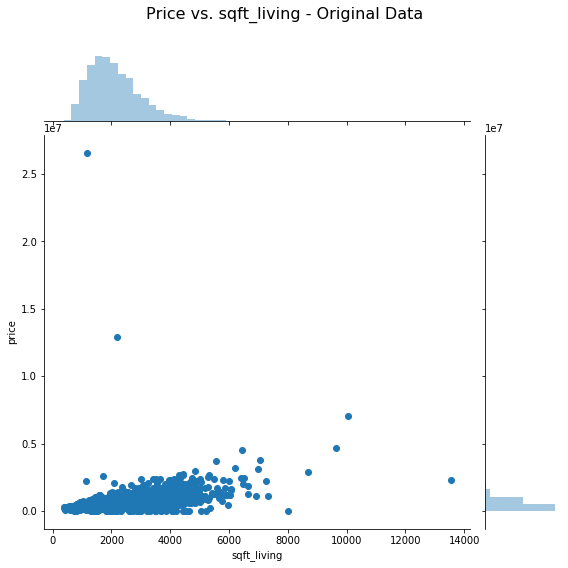

In [7]:
# We are plotting the raw structure of our data - before any modifications

sns.jointplot(x='sqft_living',y='price',data=orig_variables,height=(8))
plt.subplots_adjust(top=0.9)
plt.suptitle('Price vs. sqft_living - Original Data', fontsize = 16)


In [8]:
# We remove houses which have over 8000 square feet living area

print(len(orig_variables[(orig_variables['sqft_living']>8000)]),"sqft_living outliers were removed")
orig_variables = orig_variables[orig_variables['sqft_living'] < 8000]

5 sqft_living outliers were removed


In [9]:
# We remove houses which cost 0 .
print(len(orig_variables[(orig_variables['price'] == 0)]),"price outliers were removed")

orig_variables = orig_variables[orig_variables['price']>0]


48 price outliers were removed


In [10]:
# We remove houses which cost more than 1mil USD.

print(len(orig_variables[(orig_variables['price'] > 1000000)]),"price outliers were removed")

orig_variables = orig_variables[orig_variables['price']<1000000]


336 price outliers were removed


In [11]:
# We calcuate price mean:
print(np.mean(orig_variables['price']))

# Modified variables - filling the missing prices with the mean that was calculated after the removal of the outliers.
# ( note that we are now making the modifications on 'modified_variables' data set)

modified_variables=modified_variables.replace({'price': {0: np.mean(orig_variables['price'])}})


473020.1794889769


In [12]:
# We remove houses which have over 8000 square feet living area

print(len(modified_variables[(modified_variables['sqft_living']>8000)]),"sqft_living outliers were removed")
modified_variables = modified_variables[modified_variables['sqft_living'] < 8000]

5 sqft_living outliers were removed


In [13]:
# We remove houses which cost more than 1mil USD & less than 10000.

print(len(modified_variables[(modified_variables['price'] > 1000000) | (modified_variables['price']<10000)]),"price outliers were removed")

modified_variables = modified_variables[modified_variables['price']<1000000]

modified_variables = modified_variables[modified_variables['price']>10000]


337 price outliers were removed


Text(0.5, 0.98, 'Price vs. sqft_living - Modified Data')

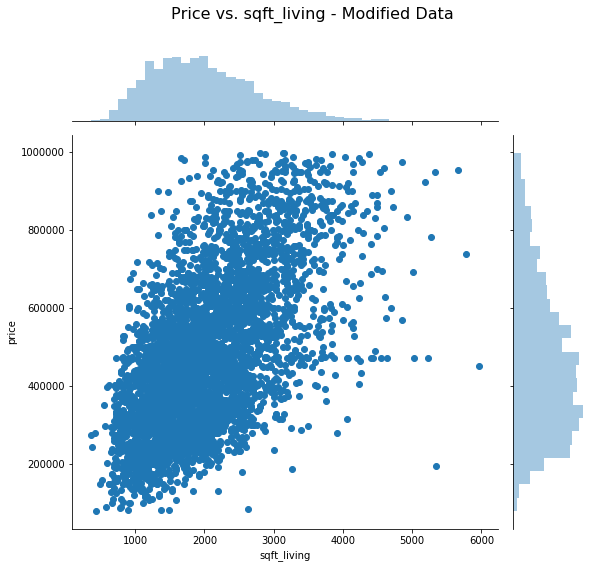

In [14]:
# Checking the effect of the removal of outliers

sns.jointplot(x='sqft_living',y='price',data= modified_variables,height=(8))
plt.subplots_adjust(top=0.9)
plt.suptitle('Price vs. sqft_living - Modified Data', fontsize = 16)

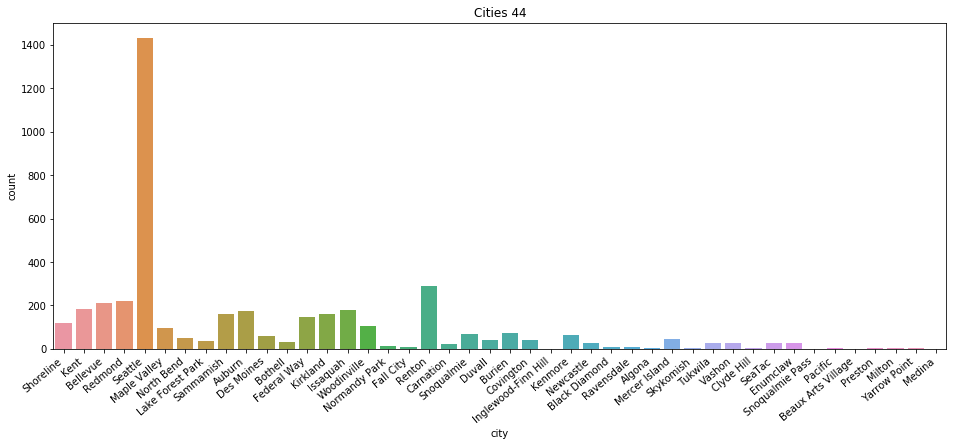

In [15]:
# Below we present the cities by the popularity in the data set

plt.figure(figsize=(16, 6))
plt.title('Cities %i' %len(orig_variables.groupby('city').agg('city')))
RN = sns.countplot(orig_variables['city'])
RN.set_xticklabels(RN.get_xticklabels(), rotation=40, ha="right")
plt.show()


In [16]:
# We list the cities by the number of observations

modified_variables['city'].value_counts().head(15)

Seattle         1443
Renton           291
Redmond          220
Bellevue         213
Kent             184
Issaquah         180
Auburn           176
Sammamish        163
Kirkland         162
Federal Way      148
Shoreline        120
Woodinville      108
Maple Valley      96
Burien            73
Snoqualmie        69
Name: city, dtype: int64

In [17]:
# One hot encoding for the cities

# We divide cities into 3 parts: Big ( Big> 300 ), Medium ( 100 < medium < 300), Small ( Small < 100)

Big = ['Seattle']

Medium = ['Renton','Bellevue','Redmond','Issaquah','Kirkland','Kent','Auburn','Sammamish',
      'Federal Way','Shoreline','Woodinville']

Small = ['Maple Valley','Mercer Island','Burien','Snoqualmie','Kenmore','Des Moines',
         'North Bend','Covington','Duvall','Lake Forest Park','Bothell','Newcastle',
         'Tukwila','SeaTac','Vashon','Enumclaw','Carnation','Normandy Park','Fall City',
         'Medina','Clyde Hill','Black Diamond','Ravensdale','Pacific','Algona',
         'Yarrow Point','Skykomish','Milton','Preston','Snoqualmie Pass',
         'Inglewood-Finn Hill','Beaux Arts Village']

# What we do here is we are grouping the cities by their popularity

modified_variables.city.loc[modified_variables.city.isin(Big)]='Big'
modified_variables.city.loc[modified_variables.city.isin(Medium)]='Medium'
modified_variables.city.loc[modified_variables.city.isin(Small)]='Small'

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
# One hot encoding
modified_variables= pd.get_dummies(modified_variables, columns=['city'])

In [19]:
# Creating a variable 'age'
modified_variables['age'] = 2014 - modified_variables['yr_built']

In [20]:
# Creating a variable 'yrs_sinceRenovation' - if no renovations took place
# then yrs_since last renovation will be today - yr_built

# ensuring that the indexes are reset
modified_variables = modified_variables.reset_index(drop=True)

yrs_sinceRenovation =[0]*len(modified_variables['yr_built'])

for i in range(0, len(yrs_sinceRenovation)):  
    if modified_variables['yr_renovated'][i] == 0:
        yrs_sinceRenovation[i] = 2014 - modified_variables['yr_built'][i]
    else:
        yrs_sinceRenovation[i] = 2014 - modified_variables['yr_renovated'][i]

In [21]:
# Appending year since renovation
modified_variables['yrs_sinceRenovation'] = yrs_sinceRenovation

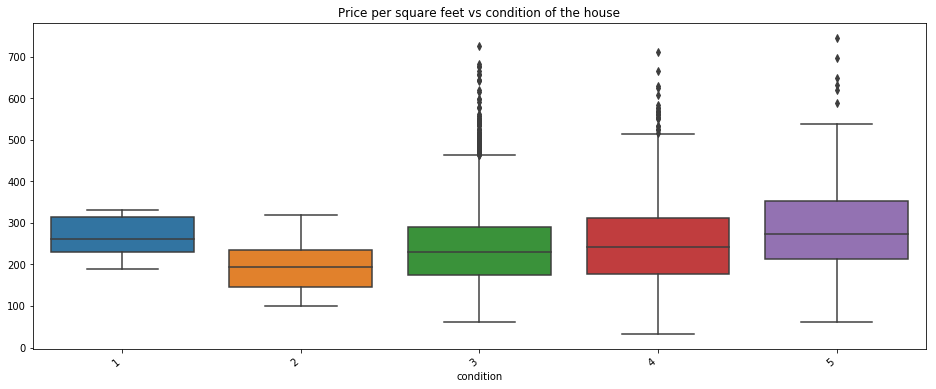

In [22]:
# Visualizing 'price_p_sqft'

plt.figure(figsize=(16,6))
plt.title('Price per square feet vs condition of the house')
RNpsqm = sns.boxplot(x=modified_variables['condition'],y=modified_variables['price'] / modified_variables['sqft_living'])
RNpsqm.set_xticklabels(RNpsqm.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [23]:
# Checking the variables after modifications
pd.set_option("display.max_columns",25)

modified_variables.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,statezip,country,city_Big,city_Medium,city_Small,age,yrs_sinceRenovation
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,WA 98133,USA,0,1,0,59,9
1,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,WA 98042,USA,0,1,0,48,48
2,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,WA 98008,USA,0,1,0,51,51
3,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,WA 98052,USA,0,1,0,38,22
4,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,WA 98115,USA,1,0,0,76,20


# 2. Linear Regression

In [24]:
# Setting our Y
us_house_price = modified_variables.filter(['price'])

# Setting our Regressors
us_houses4 = modified_variables.filter(['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
                                    'waterfront','view','condition','age','yrs_sinceRenovation',
                                    'city_Big','city_Medium','city_Small'])


In [25]:
# Setting the variables for the linear regression
X_df= us_houses4

X = X_df.iloc[:,:].values
Y = us_house_price.values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [26]:
## Training our Model ( Linear Regression - Subjective Approach)

In [27]:
## Running the linear regression algorithm

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
predicted4 = np.round(regr.predict(X_test),0)

In [28]:
# Regression metrics

#Mean Absolute Percentage Error
def MAPE(y_true, y_pred): 
    return np.mean(np.abs( (y_true - y_pred) / y_true) ) * 100

mape = MAPE(y_test, predicted4) # mean square perecentage error 28.64
mape

28.648427565208674

In [29]:
#Mean Squared Percentage Error
def MSPE(y_true, y_pred): 
    return np.mean(np.power( (y_true - y_pred) / y_true, 2) ) * 100

mspe = MSPE(y_test, predicted4) # mean absolute percentage error 15.76%
mspe


15.766068569941606

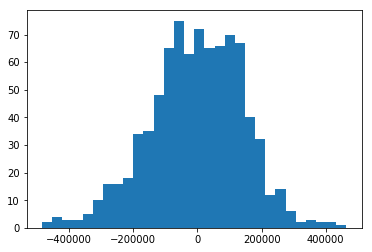

In [30]:
# Visualizing the regression errors from our subjective approach

plt.hist(np.round(regr.predict(X_test),0) - y_test, bins=30)
plt.show()

In [31]:
# Checking the coefficients

lin_reg = LinearRegression()

print('Linear Regression Coefficients')
lin_reg.fit(X,Y)
coeff_df = pd.DataFrame(lin_reg.coef_[0], X_df.columns, columns=['Coefficient'])  
print(coeff_df)


Linear Regression Coefficients
                      Coefficient
bedrooms            -21997.473457
bathrooms            26193.484757
sqft_living            162.323667
sqft_lot                 0.091950
floors               42613.624553
waterfront           61253.444260
view                 10814.892203
condition            24811.195279
age                    919.698582
yrs_sinceRenovation   -110.065022
city_Big             64841.101314
city_Medium          -7787.000836
city_Small          -57054.100478


In [32]:
# Interpretation of the results:

# In line with our intuition:

# Bathrooms are more important than bedrooms
# Sqft_living is important
# Having a waterfront view is significantly important
# The floors, the view, the condition of the house are important
# Years since renovation are intuitive
# the larger the size of the city, the higher the price

# Unintuitive
# Sqft_lot - we would expect the sqft_lot to increase with the increase in the size of lot
# Age - we would expect the price to decrease with age, however given that this is a US housing market,
# once could argue that older houses are in better location


In [24]:
# The " true machine learning approach"

# We select the explanatory variables by first randomly selecting the number of variables,
# and then selecting varaiables accordingly to their number

# Get all the variables from the dataset
variables_names = modified_variables.columns


# from the list of variables we remove the variable Price, as it constitutes the explained variable in the regression 
variables_names = variables_names[variables_names != 'price'] # explanatory variable
variables_names = variables_names[variables_names != 'date'] # same date for all variables/time series
variables_names = variables_names[variables_names != 'yr_built'] # we already have the variable 'age'
variables_names = variables_names[variables_names != 'yr_renovated'] # we already have ' yrs since renovation'
variables_names = variables_names[variables_names != 'street'] # we already have city big ,small,medium
variables_names = variables_names[variables_names != 'country'] # all observations are in the US ( washington state)
variables_names = variables_names[variables_names != 'statezip'] # high cardinality variable & we already have the var. location

# we remove sqft_living because sqft_basement + sqft_above = sqft_living and thus they are correlated
# since we now care about sqft_basement, we proceed according to the above
variables_names = variables_names[variables_names != 'sqft_living'] # high cardinality variable & we already have the var. location


print(variables_names)

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'sqft_above', 'sqft_basement', 'city_Big', 'city_Medium',
       'city_Small', 'age', 'yrs_sinceRenovation'],
      dtype='object')


0
Index(['view', 'waterfront', 'condition', 'sqft_lot', 'sqft_basement',
       'bathrooms', 'floors', 'bedrooms', 'sqft_above'],
      dtype='object')
MSPE: 16.99 % split 1
MAPE: 30.81 % split 1
MSPE: 18.73 % split 2
MAPE: 31.42 % split 2
MSPE: 22.09 % split 3
MAPE: 32.29 % split 3
MSPE: 23.10 % split 4
MAPE: 31.68 % split 4
MSPE: 18.66 % split 5
MAPE: 31.71 % split 5
MSPE: 26.05 % split 6
MAPE: 32.86 % split 6
MSPE: 19.43 % split 7
MAPE: 31.40 % split 7
MSPE: 26.03 % split 8
MAPE: 32.51 % split 8
MSPE: 21.38 % split 9
MAPE: 31.79 % split 9
MSPE: 25.86 % split 10
MAPE: 34.60 % split 10


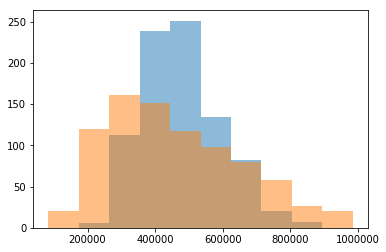

1
Index(['bedrooms', 'bathrooms'], dtype='object')
MSPE: 25.92 % split 1
MAPE: 37.34 % split 1
MSPE: 21.78 % split 2
MAPE: 34.76 % split 2
MSPE: 26.73 % split 3
MAPE: 37.66 % split 3
MSPE: 27.25 % split 4
MAPE: 36.29 % split 4
MSPE: 26.15 % split 5
MAPE: 36.53 % split 5
MSPE: 22.04 % split 6
MAPE: 34.93 % split 6
MSPE: 25.78 % split 7
MAPE: 36.84 % split 7
MSPE: 24.77 % split 8
MAPE: 36.24 % split 8
MSPE: 25.40 % split 9
MAPE: 36.06 % split 9
MSPE: 25.77 % split 10
MAPE: 35.91 % split 10


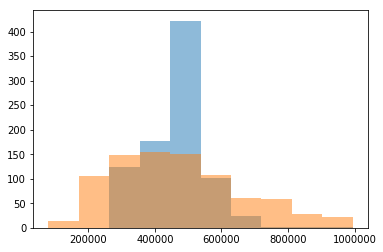

2
Index(['bathrooms', 'sqft_above', 'view', 'city_Small', 'condition',
       'city_Medium', 'city_Big', 'sqft_lot', 'floors', 'sqft_basement',
       'bedrooms', 'age', 'waterfront'],
      dtype='object')
MSPE: 17.33 % split 1
MAPE: 29.49 % split 1
MSPE: 16.83 % split 2
MAPE: 29.50 % split 2
MSPE: 16.21 % split 3
MAPE: 27.64 % split 3
MSPE: 17.79 % split 4
MAPE: 28.68 % split 4
MSPE: 19.40 % split 5
MAPE: 29.18 % split 5
MSPE: 22.28 % split 6
MAPE: 29.49 % split 6
MSPE: 20.03 % split 7
MAPE: 29.42 % split 7
MSPE: 18.55 % split 8
MAPE: 27.87 % split 8
MSPE: 18.33 % split 9
MAPE: 29.11 % split 9
MSPE: 18.27 % split 10
MAPE: 29.67 % split 10


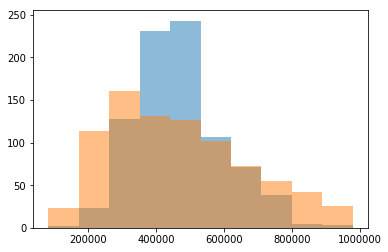

3
Index(['bedrooms', 'bathrooms'], dtype='object')
MSPE: 29.10 % split 1
MAPE: 37.85 % split 1
MSPE: 25.94 % split 2
MAPE: 36.89 % split 2
MSPE: 24.50 % split 3
MAPE: 36.10 % split 3
MSPE: 26.15 % split 4
MAPE: 36.79 % split 4
MSPE: 27.62 % split 5
MAPE: 38.30 % split 5
MSPE: 26.23 % split 6
MAPE: 36.45 % split 6
MSPE: 28.72 % split 7
MAPE: 38.41 % split 7
MSPE: 23.68 % split 8
MAPE: 35.32 % split 8
MSPE: 23.36 % split 9
MAPE: 35.54 % split 9
MSPE: 28.86 % split 10
MAPE: 37.63 % split 10


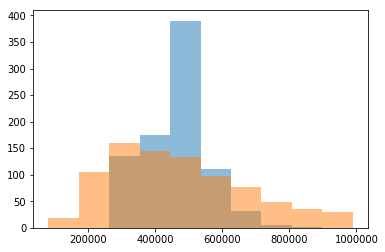

4
Index(['condition', 'sqft_above', 'bedrooms', 'sqft_lot', 'waterfront',
       'bathrooms', 'sqft_basement', 'view', 'floors'],
      dtype='object')
MSPE: 23.12 % split 1
MAPE: 32.65 % split 1
MSPE: 20.00 % split 2
MAPE: 31.87 % split 2
MSPE: 21.15 % split 3
MAPE: 32.43 % split 3
MSPE: 20.60 % split 4
MAPE: 31.51 % split 4
MSPE: 19.96 % split 5
MAPE: 32.87 % split 5
MSPE: 17.13 % split 6
MAPE: 30.20 % split 6
MSPE: 21.56 % split 7
MAPE: 32.50 % split 7
MSPE: 20.03 % split 8
MAPE: 31.72 % split 8
MSPE: 22.37 % split 9
MAPE: 31.59 % split 9
MSPE: 20.40 % split 10
MAPE: 32.53 % split 10


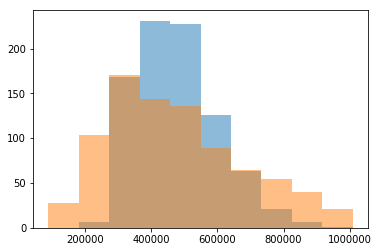

5
Index(['bathrooms', 'sqft_lot', 'condition', 'waterfront', 'bedrooms',
       'floors', 'view'],
      dtype='object')
MSPE: 23.74 % split 1
MAPE: 35.06 % split 1
MSPE: 22.87 % split 2
MAPE: 35.00 % split 2
MSPE: 25.24 % split 3
MAPE: 36.37 % split 3
MSPE: 23.13 % split 4
MAPE: 34.26 % split 4
MSPE: 22.91 % split 5
MAPE: 35.17 % split 5
MSPE: 24.05 % split 6
MAPE: 35.08 % split 6
MSPE: 27.39 % split 7
MAPE: 35.79 % split 7
MSPE: 24.20 % split 8
MAPE: 35.58 % split 8
MSPE: 27.32 % split 9
MAPE: 35.34 % split 9
MSPE: 26.53 % split 10
MAPE: 36.02 % split 10


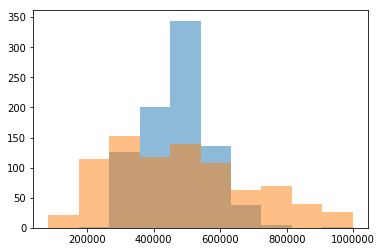

6
Index(['bedrooms', 'waterfront', 'sqft_lot', 'bathrooms', 'floors'], dtype='object')
MSPE: 22.17 % split 1
MAPE: 33.69 % split 1
MSPE: 23.95 % split 2
MAPE: 35.45 % split 2
MSPE: 23.43 % split 3
MAPE: 35.68 % split 3
MSPE: 24.85 % split 4
MAPE: 36.56 % split 4
MSPE: 23.63 % split 5
MAPE: 35.44 % split 5
MSPE: 27.38 % split 6
MAPE: 37.20 % split 6
MSPE: 22.87 % split 7
MAPE: 34.81 % split 7
MSPE: 30.30 % split 8
MAPE: 38.50 % split 8
MSPE: 24.72 % split 9
MAPE: 34.64 % split 9
MSPE: 27.86 % split 10
MAPE: 37.68 % split 10


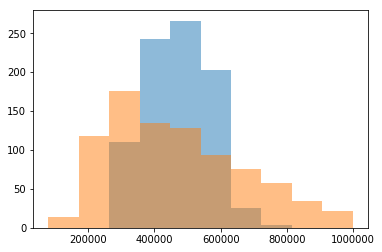

7
Index(['bedrooms', 'sqft_lot', 'floors', 'sqft_basement', 'view', 'bathrooms',
       'waterfront', 'condition', 'sqft_above'],
      dtype='object')
MSPE: 24.15 % split 1
MAPE: 32.36 % split 1
MSPE: 24.09 % split 2
MAPE: 32.79 % split 2
MSPE: 21.95 % split 3
MAPE: 31.90 % split 3
MSPE: 21.46 % split 4
MAPE: 31.73 % split 4
MSPE: 19.41 % split 5
MAPE: 31.98 % split 5
MSPE: 21.54 % split 6
MAPE: 31.88 % split 6
MSPE: 23.59 % split 7
MAPE: 31.52 % split 7
MSPE: 23.60 % split 8
MAPE: 33.29 % split 8
MSPE: 22.18 % split 9
MAPE: 32.00 % split 9
MSPE: 22.14 % split 10
MAPE: 31.88 % split 10


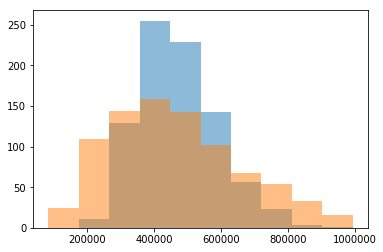

8
Index(['bathrooms', 'waterfront', 'sqft_lot', 'floors', 'view', 'bedrooms'], dtype='object')
MSPE: 24.81 % split 1
MAPE: 35.01 % split 1
MSPE: 28.77 % split 2
MAPE: 36.48 % split 2
MSPE: 24.61 % split 3
MAPE: 36.10 % split 3
MSPE: 27.97 % split 4
MAPE: 36.39 % split 4
MSPE: 23.80 % split 5
MAPE: 35.14 % split 5
MSPE: 24.99 % split 6
MAPE: 35.80 % split 6
MSPE: 24.44 % split 7
MAPE: 35.00 % split 7
MSPE: 24.37 % split 8
MAPE: 36.52 % split 8
MSPE: 23.81 % split 9
MAPE: 35.50 % split 9
MSPE: 27.06 % split 10
MAPE: 35.85 % split 10


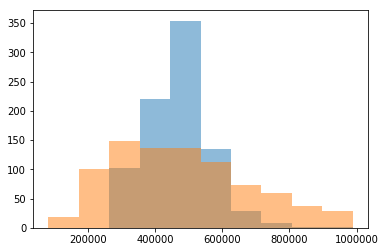

9
Index(['view', 'floors', 'waterfront', 'bedrooms', 'bathrooms', 'sqft_above',
       'sqft_lot', 'condition'],
      dtype='object')
MSPE: 22.16 % split 1
MAPE: 32.78 % split 1
MSPE: 26.03 % split 2
MAPE: 33.49 % split 2
MSPE: 20.34 % split 3
MAPE: 32.73 % split 3
MSPE: 28.57 % split 4
MAPE: 34.81 % split 4
MSPE: 21.62 % split 5
MAPE: 33.81 % split 5
MSPE: 24.50 % split 6
MAPE: 33.43 % split 6
MSPE: 20.28 % split 7
MAPE: 32.48 % split 7
MSPE: 27.80 % split 8
MAPE: 35.06 % split 8
MSPE: 25.57 % split 9
MAPE: 34.50 % split 9
MSPE: 23.10 % split 10
MAPE: 32.70 % split 10


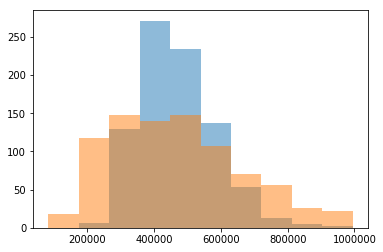

10
Index(['sqft_lot', 'city_Small', 'view', 'sqft_above', 'city_Big',
       'sqft_basement', 'floors', 'city_Medium', 'bedrooms', 'condition',
       'waterfront', 'age', 'bathrooms'],
      dtype='object')
MSPE: 17.06 % split 1
MAPE: 27.67 % split 1
MSPE: 22.59 % split 2
MAPE: 29.82 % split 2
MSPE: 21.05 % split 3
MAPE: 29.76 % split 3
MSPE: 19.87 % split 4
MAPE: 28.17 % split 4
MSPE: 18.00 % split 5
MAPE: 27.97 % split 5
MSPE: 19.95 % split 6
MAPE: 28.42 % split 6
MSPE: 18.49 % split 7
MAPE: 28.10 % split 7
MSPE: 19.57 % split 8
MAPE: 28.97 % split 8
MSPE: 17.66 % split 9
MAPE: 27.72 % split 9
MSPE: 16.19 % split 10
MAPE: 28.15 % split 10


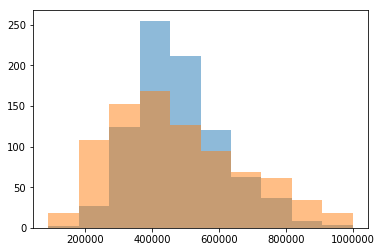

In [25]:
# The machine learning approach for choosing the most optimal regressors

mape_total = np.array([]) # creating an empty array for mape results
mspe_total = np.array([]) # creating an empty array for mspe results

# error metrics
def MAPE(y_true, y_pred): 
    return np.mean(np.abs( (y_true - y_pred) / y_true) ) * 100

def MSPE(y_true, y_pred): 
    return np.mean(np.power( (y_true - y_pred) / y_true, 2) ) * 100

# libraries
from random import randint
from random import sample
import matplotlib.pyplot as plt

for i in range(0,11):
    print(i) 
        
    num_regressors = (randint(1, len(variables_names)-1)) # selecting the random number of regressors ( their indexes)
    indexes_selected_variables = sample(range(0, num_regressors ), num_regressors) # converting the indexes into a list
    randomly_selected_regressors = variables_names[indexes_selected_variables] # pulling out the names of the variables by indx
    us_house_price = modified_variables.filter(['price']) # price is our Y
        
    print(randomly_selected_regressors)
    
    X_df = modified_variables[randomly_selected_regressors] # pulling out the data from the data frame
    X = X_df.iloc[:,:].values # converting it into values
    Y = us_house_price.values # Y
                
    for j in range(1,11):
        mspe_for_specific_regrssion = np.array([]) # creating an empty list to store mspe results
        mape_for_specific_regrssion = np.array([]) # creating an empty list to store mape results
                    
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) # train/test split
        
        # traing/test split for every iteration
        regr = linear_model.LinearRegression() 
        regr.fit(X_train, y_train)
        predicted = np.round(regr.predict(X_test),0)
            
        print("MSPE: %.2f" % MSPE(y_test, predicted),"%","split",j)
        print("MAPE: %.2f" % MAPE(y_test, predicted),"%","split",j)
         
        # calculating MSPE and MAPE for every iteration
        mspe = MSPE(y_test, predicted)
        mape = MAPE(y_test, predicted)
        
        # appending the list with the result of every iteration
        mspe_for_specific_regrssion = np.append(mspe_for_specific_regrssion, mspe)
        mape_for_specific_regrssion = np.append(mape_for_specific_regrssion, mape)
    
    # calculating the average result of MAPE and MASPE for each of the splits
    mspe_total = np.append(mspe_total, np.mean(mspe_for_specific_regrssion))
    mape_total = np.append(mape_total, np.mean(mape_for_specific_regrssion))
            
    # creating a graph    
    bins = np.linspace(min(min(predicted), min(y_test)), max(max(predicted), max(y_test)), 11)
            
    plt.hist(predicted, bins, alpha=0.5, label='x')
    plt.hist(y_test, bins, alpha=0.5, label='y')

    plt.show()

In [26]:
# Orange histogram represents the predicted values
# Blue histogram represents the test values

print(mape_total)
print(mspe_total)

# mape & mspe total show the average mean absolute percentage error and mean squared percentage error.

# In this case the (10th) iteration is the most optimal as the avg. mape for 10 simulations of 

# ['sqft_lot', 'city_Small', 'view', 'sqft_above', 'city_Big',
#        'sqft_basement', 'floors', 'city_Medium', 'bedrooms', 'condition',
#        'waterfront', 'age', 'bathrooms'] was 28.14%% and mspe was 16.19%.



[34.59867891 35.90568923 29.67115937 37.62984454 32.53136402 36.02313564
 37.68030126 31.88352388 35.85227113 32.70377053 28.1464198 ]
[25.86009202 25.76736419 18.2653587  28.86002522 20.4017608  26.52668992
 27.8608779  22.13538079 27.0591951  23.10317793 16.19398434]


In [27]:
# Setting the variables for the linear regression according the true machine learning approach

ml_house_price = modified_variables.filter(['price'])
Y = ml_house_price.values # Y remains unchanged


In [28]:
# setting our Regressors according to the true ML approach
ml_approach = modified_variables.filter(['sqft_lot', 'city_Small', 'view', 'sqft_above', 'city_Big','sqft_basement',
'floors', 'city_Medium', 'bedrooms', 'condition','waterfront', 'age', 'bathrooms'])

In [29]:
X_mf= ml_approach

In [30]:
X = X_mf.iloc[:,:].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [32]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
predict_ML = np.round(regr.predict(X_test),0)

In [33]:
lin_reg = LinearRegression()

print('Linear Regression Coefficients')
lin_reg.fit(X,Y)
ml_df = pd.DataFrame(lin_reg.coef_[0], X_mf.columns, columns=['Coefficient'])  
print(ml_df)

Linear Regression Coefficients
                Coefficient
sqft_lot           0.072736
city_Small    -62056.878434
view           14000.325952
sqft_above       175.050346
city_Big       74448.484782
sqft_basement    122.193412
floors         19430.591026
city_Medium   -12391.606348
bedrooms      -20221.579155
condition      26086.947939
waterfront     60262.873029
age              880.081928
bathrooms      32291.880151


In [43]:
# The results are broadly in line with the previous results

# 3. KNN regression

In [45]:
from sklearn.model_selection import train_test_split

# For same combination as before

# setting our Y
us_house_price = modified_variables.filter(['price'])

# setting our Regressors
us_houses4 = modified_variables.filter(['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
                                    'waterfront','view','condition','age','yrs_sinceRenovation',
                                    'city_Big','city_Medium','city_Small'])

# same combination as before
X_df= us_houses4

X = X_df.iloc[:,:].values
Y = us_house_price.values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)



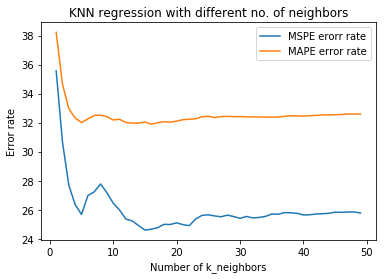

In [46]:
# Looking for an optimal number of KNN neighbours, basing on the error matrix
from sklearn.neighbors import KNeighborsRegressor

#creating empty lists to store the results
k_neighbors = np.arange(1,50)
mspe_score =np.empty(len(k_neighbors))
mape_score = np.empty(len(k_neighbors))

for i,k in enumerate(k_neighbors):
    
    # number of KNN neighbors
    knn = KNeighborsRegressor(n_neighbors=k,p=1) # Manhattan distance
    
    #fitting the model
    knn.fit(X_train, y_train)
    output = np.round(knn.predict(X_test),0)
    
    #error rate ( mspe )
    mspe_score[i] = MSPE(y_test, output)
    
    #error rate ( mape )
    mape_score[i] = MAPE(y_test, output)
    
plt.title('KNN regression with different no. of neighbors')
plt.plot(k_neighbors, mspe_score, label='MSPE erorr rate')
plt.plot(k_neighbors, mape_score, label='MAPE error rate')
plt.legend()
plt.xlabel('Number of k_neighbors')
plt.ylabel('Error rate')
plt.show()

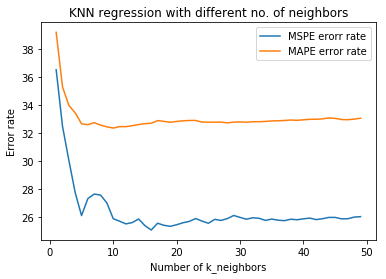

In [47]:
# Let us verify if the results with using a different distance measure - Euclidean distance ( previously we used Manhattan):

# Looking for an optimal number of KNN neighbours, basing on the error matrix

#creating empty lists to store the results
k_neighbors = np.arange(1,50)
mspe_score =np.empty(len(k_neighbors))
mape_score = np.empty(len(k_neighbors))

for i,k in enumerate(k_neighbors):
    
    # number of KNN neighbors
    knn = KNeighborsRegressor(n_neighbors=k,p=2) # Euclidean distance
    
    #fitting the model
    knn.fit(X_train, y_train)
    output = np.round(knn.predict(X_test),0)
    
    #error rate ( mspe )
    mspe_score[i] = MSPE(y_test, output)
    
    #error rate ( mape )
    mape_score[i] = MAPE(y_test, output)
    
plt.title('KNN regression with different no. of neighbors')
plt.plot(k_neighbors, mspe_score, label='MSPE erorr rate')
plt.plot(k_neighbors, mape_score, label='MAPE error rate')
plt.legend()
plt.xlabel('Number of k_neighbors')
plt.ylabel('Error rate')
plt.show()

In [48]:
# According to the above graph with Euclidean distance, the optimal number of k neighbours is aproximately 15.

In [48]:
# Running the KNN  algorithm

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=15,p=2)
knn.fit(X_train, y_train)
outputs = np.round(knn.predict(X_test),0)

# Error metrics
def MSPE(y_true, y_pred): 
    return np.mean(np.power( (y_true - y_pred) / y_true, 2) ) * 100

def MAPE(y_true, y_pred): 
    return np.mean(np.abs( (y_true - y_pred) / y_true) ) * 100


mspe = MSPE(y_test, outputs)
print("MSPE",mspe)

mape = MAPE(y_test, outputs)
print("MAPE",mape)

MSPE 25.719174591635124
MAPE 32.48236901983691


# 4. Cross Validation

In [125]:
# K-fold cross validation

#from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

lin_reg = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=15)

Y_pred_linRegr = cross_val_predict(lin_reg, X, Y, cv=10, n_jobs= 8) 
Y_pred_knn = cross_val_predict(knn,X,Y,cv=15,n_jobs=8)


In [126]:
# Kfold cross validation metrics

def errorMetrics(y_test,y_pred, name):
    print(name)
    print("Mean Absolute Percentage Error= "+ str(MAPE(y_test, y_pred)))
    print("Mean Squared Percentage Error=" +str(MSPE(y_test, y_pred)))
    
errorMetrics(Y,Y_pred_linRegr,"LinearRegression")
errorMetrics(Y,Y_pred_knn,"KNN")


LinearRegression
Mean Absolute Percentage Error= 28.81762415629397
Mean Squared Percentage Error=17.965236836870073
KNN
Mean Absolute Percentage Error= 32.04937207155235
Mean Squared Percentage Error=23.062016744301495


In [122]:
# K-fold cross validation
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=15)

linReg_cv= cross_val_score(lin_reg, X, Y, cv=5) # running 5 k-fold cv for linear regression
print(linReg_cv)
print("lin_reg CV scores, mean:{}".format(np.mean(linReg_cv)))

knn_cv = cross_val_score(knn,X,Y,cv=5) # running 5 k-fold cv for knn regression
print(knn_cv)
print("knn_cv scores, mean:{}".format(np.mean(knn_cv)))


[0.51949429 0.46637914 0.50954694 0.49053966 0.2627936 ]
lin_reg CV scores, mean:0.4497507250709146
[0.38108546 0.3639251  0.39282958 0.38061178 0.2302466 ]
knn_cv scores, mean:0.3497397056709011


# Final conclusions

In [127]:

# Given the above MAPE metric of 28% , MSPE of 18% and R2 score of 45%, for regression, as well as
# MAPE metric of 32%, MSPE of 23% and R2 score of 35% for KNN; we can conclude that the error rate for our model is rougly 30%, 
# This translates to the fact that on average the difference between the values predicted by our model and the real values
# is 30%. On the other hand, the R2 metric of approximately 40% , suggests that the model explains 40% of the variance, 
# which further suggests that the model is underfit.

# Overall, the model is quite too general to capture the variability of the data. Having in mind that we have used the
# " true machine learning approach " , where we have built the loop to find the regressors which would give us the lowest
# possible error metrics ,and the fact that we have used an additional algorithm ( KNN regression) which hasn't improved our
# scores, we assume that we have exhausted the options with regards to the choice of the algorithm and feature selection.

# This model could be possibly improved further with feature engineering. For example the zip code could be explored further;
# by investigating the zip codes, we could obtain more information such as: population of the city, racial breakdown, education,
# and other information, which could help to improve our model.

